In [1]:
#import library
import numpy as np
import pandas as pd
from datetime import date
from neupy import algorithms
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import keras
from keras import regularizers
import pyrenn as prn
from keras.callbacks import EarlyStopping

c:\users\qqwea1223\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\qqwea1223\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\qqwea1223\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\user

In [2]:
#count day after planting
def countDaysAfterPlanting(date_planted, date_key):
#     print(date_planting, date_key)
    f_date = date(2016, int(date_planted[:2]), int(date_planted[2:4]))
    l_date = ''.join(s for s in date_key if s.isdigit())
    #print(int('20'+l_date[:2]), int(l_date[2:4]), int(l_date[4:6]))
    l_date = date(2016, int(l_date[:2]), int(l_date[2:4]))
    return((l_date-f_date).days)

In [3]:
#count day after planting
def countDaysAfterPlanting(date_planted, date_key, year = 2016):
#     print(date_planted, date_key)
#     print(int(date_planted[:2]))
#     print(int(date_planted[2:4]))
#     print(type(year))
    
    f_date = date(2016, int(date_planted[:2]), int(date_planted[2:4]))
    l_date = ''.join(s for s in date_key if s.isdigit())
    try:
        l_date = date(2016, int(l_date[:2]), int(l_date[2:4]))
    except:
        print(f_date)
        print('asd')
        print(date_key)
    #print(int('20'+l_date[:2]), int(l_date[2:4]), int(l_date[4:6]))
    
    return((l_date-f_date).days +1)

In [4]:
canopy_dataframe = pd.read_excel('cotton_2016_alldata_row.xlsx', 'ALL')
akash_data = pd.read_excel('X.xlsx', 'Sheet1')
index_mask = pd.read_excel('index_of_considered_samples.xlsx', 'Sheet1', header = None)

In [5]:
parameter = 'cc'
cc_data = pd.read_csv('cotton_2016_plot_canopy_cover_per_row_with_yield.csv')
cc_data = cc_data[[x for x in cc_data.columns if parameter in x]]

In [199]:
first_remove = np.array([341, 427, 559, 748, 810])
first_mask = np.isin(canopy_dataframe['order'].values, first_remove)
print(first_mask.shape)
first_mask = np.logical_not(first_mask)
print(first_mask.shape)
print(len(canopy_dataframe))
canopy_dataframe = canopy_dataframe[first_mask]
cc_data = cc_data[first_mask]
canopy_dataframe = canopy_dataframe.reset_index()
canopy_dataframe.shape

(875,)
(875,)
875


(870, 161)

In [200]:
canopy_index = np.array(canopy_dataframe.index)
index_mask = np.array(index_mask)
index_mask = index_mask -1

In [201]:

mask  = np.isin(canopy_index, index_mask) 
# print(canopy_dataframe['order'].values.shape)
# print(index_mask.values.shape)
canopy_dataframe = canopy_dataframe[mask]
print(mask.shape)
print(sum(mask))
cc_data = cc_data[mask]
# print(canopy_dataframe.shape)
# # print(sum(mask_CH))
canopy_dataframe = canopy_dataframe.reset_index()

(870,)
805


In [181]:
canopy_dataframe.index

RangeIndex(start=0, stop=805, step=1)

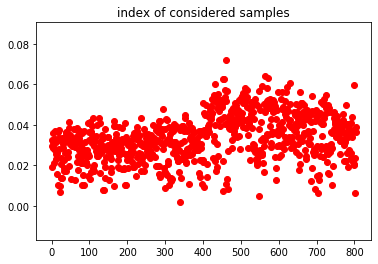

In [202]:
yield_data = canopy_dataframe['Weight per row (lbs)'].values
yield_data /= np.linalg.norm(yield_data)

plt.scatter(range(len(yield_data)), yield_data, color='r')
plt.title('index of considered samples')
plt.show()

In [206]:
len(yield_data)

805

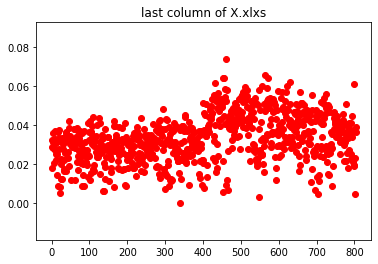

In [162]:
akash_yield_data = akash_data[akash_data.columns[-1]].values
akash_yield_data /= np.linalg.norm(akash_yield_data)
plt.scatter(range(len(akash_yield_data)), akash_yield_data, color='r')
plt.title('last column of X.xlxs')
plt.show()

In [204]:
sum(akash_yield_data==0)

1

In [86]:
mask  = canopy_dataframe['Weight per row (lbs)'].values > 0
# print(canopy_dataframe['order'].values.shape)
# print(index_mask.values.shape)
canopy_dataframe = canopy_dataframe[mask]
print(mask.shape)
print(sum(mask))
cc_data = cc_data[mask]
# print(canopy_dataframe.shape)
# # print(sum(mask_CH))
canopy_dataframe = canopy_dataframe.reset_index()


(875,)
872


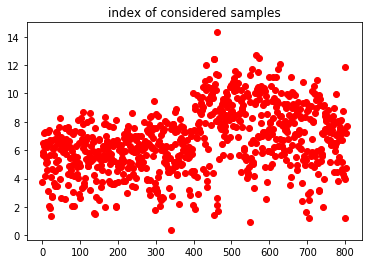

In [159]:
yield_data = canopy_dataframe['Weight per row (lbs)'].values
yield_data /= np.linalg.norm(yield_data)
plt.scatter(range(len(yield_data)), yield_data, color='r')
plt.title('index of considered samples')
plt.show()

In [97]:
yield_data.shape

(802,)

In [45]:
sum(yield_data == 0)

3

In [161]:
akash_data = pd.read_excel('X.xlsx', 'Sheet1')

In [38]:
akash_yield_data.shape

(805,)

In [15]:
parameter = 'cc'
cc_data = cc_data[[x for x in cc_data.columns if parameter in x]]
cc_data.shape

(802, 27)

In [191]:
plant_parameters = ['ch', 'cv', 'ExG', 'NDVI']
data = {}
plant_date = '0401'
removing_date = [68]

In [207]:
planting_date = '0401'
for (i,parameter) in enumerate(plant_parameters):
    data[parameter] = canopy_dataframe[[x for x in canopy_dataframe.columns if parameter in x and len(parameter) +  4==len(x)]]
#     print(type(data[parameter]))
    date_keys = data[parameter].columns
    days_after_planting = np.array([countDaysAfterPlanting(plant_date, date_key) for date_key in date_keys])
    mask = np.ones(days_after_planting.shape)
#     print(mask.shape)
#     print(days_after_planting.shape)
#     for date in removing_date:
#         mask = (mask) & (days_after_planting != date)
    mask = days_after_planting!=68
    data[parameter] = data[parameter][data[parameter].columns[mask]]
    path = '2016_spring/2016_spring_'+parameter+'.csv'
    data[parameter].to_csv(path, index=False, header=True)
    print(data[parameter].shape)
    
    
parameter = 'cc'    
#Process CC data
data[parameter] = cc_data
#     print(type(data[parameter]))
date_keys = data[parameter].columns
days_after_planting = np.array([countDaysAfterPlanting(plant_date, date_key) for date_key in date_keys])
mask = np.ones(days_after_planting.shape)


mask = days_after_planting!=68
data[parameter] = data[parameter][data[parameter].columns[mask]]
path = '2016_spring/2016_spring_'+parameter+'.csv'
data[parameter].to_csv(path, index=False, header=True)
print(data[parameter].shape)

#     np.savetxt(path, processed_data[parameter], header = data[parameter].columns)
#     days_after_planting = [countDaysAfterPlanting(planting_date, x) for x in data[parameter].columns]
   
path = '2016_spring/2016_spring.csv'
canopy_dataframe.to_csv(path, index=False, header=True)

(805, 26)
(805, 26)
(805, 27)
(805, 18)
(805, 26)


In [343]:
planting_date = '0401'
for (i,parameter) in enumerate(plant_parameters):
    data[parameter] = canopy_dataframe[[x for x in canopy_dataframe.columns if parameter in x and len(parameter) +  4==len(x)]]
#     print(type(data[parameter]))
    date_keys = data[parameter].columns
    days_after_planting = np.array([countDaysAfterPlanting(plant_date, date_key) for date_key in date_keys])
    mask = np.ones(days_after_planting.shape) == 1
#     print(mask.shape)
#     print(days_after_planting.shape)
#     for date in removing_date:
#         mask = (mask) & (days_after_planting != date)
#     mask = days_after_planting!=date
    data[parameter] = data[parameter][data[parameter].columns[mask]]
    path = '2016_spring/2016_spring_'+parameter+'.csv'
    data[parameter].to_csv(path, index=False, header=True)
    print(data[parameter].shape)
#     np.savetxt(path, processed_data[parameter], header = data[parameter].columns)
#     days_after_planting = [countDaysAfterPlanting(planting_date, x) for x in data[parameter].columns]
    

(802, 27)
(802, 27)
(802, 28)
(802, 19)


In [333]:
a = np.array([True, True, False])
b = np.array([False, False, False])
c = a & (b != 1)
for i in range(3):
    c = c & a
c

array([ True,  True, False])

In [321]:
planting_date = '0401'
for (i,parameter) in enumerate(plant_parameters):
    data[parameter] = canopy_dataframe[[x for x in canopy_dataframe.columns if parameter in x and len(parameter) +  4==len(x)]]
#     print(type(data[parameter]))
    date_keys = data[parameter].columns
    print(date_keys)
    days_after_planting = np.array([countDaysAfterPlanting(plant_date, date_key) for date_key in date_keys])
    mask = np.ones(days_after_planting.shape)
    for date in removing_date:
        mask = (mask) & (days_after_planting != date)
    data[parameter] = data[parameter][data[parameter].column[mask]]
    path = '2016_spring/2016_spring_'+parameter+'.csv'
    data[parameter].to_csv(path, index=False, header=True)
    print(data[parameter].shape)
#     np.savetxt(path, processed_data[parameter], header = data[parameter].columns)
#     days_after_planting = [countDaysAfterPlanting(planting_date, x) for x in data[parameter].columns]
    

Index(['ch0412', 'ch0415', 'ch0427', 'ch0506', 'ch0516', 'ch0520', 'ch0523',
       'ch0527', 'ch0531', 'ch0602', 'ch0607', 'ch0614', 'ch0617', 'ch0620',
       'ch0623', 'ch0627', 'ch0630', 'ch0708', 'ch0713', 'ch0716', 'ch0719',
       'ch0721', 'ch0725', 'ch0728', 'ch0802', 'ch0808', 'ch0812'],
      dtype='object')
0401 ch0412


TypeError: 'int' object is not callable

In [173]:
def GRNN_process(row_data, days_after_planting, x_pred, std):
#     print(row_data.shape)
#     print(days_after_planting.shape)
    if (days_after_planting[0] != 0):
        days_after_planting = np.append([0], days_after_planting, axis = 0)
        row_data = np.append([0], row_data, axis = 0)
    grnn = algorithms.GRNN(std = std)
    grnn.train(days_after_planting, row_data)
    result = grnn.predict(x_pred)
    result = result.swapaxes(0,1)
    
#     print(result)
    return result

In [174]:
plant_date = '0401'
limit_day = 105
interval_day = 7
x_pred = range(interval_day, limit_day+1, interval_day)

In [185]:
x_normalization_mask = []
processed_data = {}
std = 10
for parameter in plant_parameters:
#     print(type(data[parameter]))
    parameter_data = data[parameter]
    date_keys = parameter_data.columns
    interval_process_parameter_data = np.empty([0, len(x_pred)])
    for row in range(len(parameter_data)):      
#         print(row)
        row_data = parameter_data.loc[row].values
        days_after_planting = np.array([countDaysAfterPlanting(plant_date, date_key) for date_key in date_keys])
        if parameter != 'ExG':
#             print(len(days_after_planting))
#             print(len(mask))
            mask = row_data>0
            row_data = row_data[mask]
            days_after_planting = days_after_planting[mask]
        
#             print(days_after_planting)
#             print(mask.shape)
        
        GRNN_data = GRNN_process(row_data, days_after_planting, x_pred, std)
        interval_process_parameter_data = np.append(interval_process_parameter_data, GRNN_data, axis = 0)
    x_normalization_mask.append(np.linalg.norm(interval_process_parameter_data))
    processed_data[parameter]  = interval_process_parameter_data
        

In [178]:
for parameter in plant_parameters:
    path = '2016_spring/2016_spring_'+parameter+'.csv'
    np.savetxt(path, processed_data[parameter])

In [116]:
parameter_data.loc[20].values

array([0.092682, 0.00152 , 0.006774, 0.150666, 0.311336, 0.41196 ,
       0.521877, 0.650096, 0.711494, 0.769437, 0.385106, 1.04604 ,
       1.140188, 1.194218, 1.20202 , 1.26144 , 1.251129, 1.236641,
       1.302203, 1.234528, 1.123216, 1.198992, 1.188111, 1.132755,
       1.284466, 0.657377, 0.025715])

In [119]:
parameter_data.head(40)

,ch0412,ch0415,ch0427,ch0506,ch0516,ch0520,ch0523,ch0527,ch0531,ch0602,...,ch0708,ch0713,ch0716,ch0719,ch0721,ch0725,ch0728,ch0802,ch0808,ch0812
0,0.117556,0.040763,0.029998,0.112485,0.231000,0.334091,0.421230,0.481593,0.600513,0.683975,...,1.120118,1.090625,1.124272,1.047165,1.087766,1.087802,1.067452,1.144571,0.963581,0.040902
1,0.118253,0.031832,0.041368,0.234447,0.405406,0.503273,0.613796,0.680308,0.790371,0.870143,...,1.245794,1.284730,1.232510,1.155877,1.208155,1.205343,1.138991,1.262682,0.766864,0.071599
2,0.119494,0.040166,0.033944,0.209571,0.392771,0.502291,0.612927,0.702499,0.811496,0.862581,...,1.333706,1.350187,1.352628,1.253902,1.332819,1.320125,1.283309,1.379527,0.509776,0.019033
3,0.117628,0.036958,0.029158,0.214424,0.399932,0.501714,0.617603,0.708619,0.822769,0.884560,...,1.408846,1.337289,1.373914,1.262875,1.353894,1.342054,1.263788,1.268827,0.315076,0.033838
4,0.115710,0.038004,0.027003,0.171273,0.331701,0.432336,0.524227,0.617355,0.745845,0.807628,...,1.174947,1.269726,1.203214,1.106320,1.167667,1.150252,1.115570,1.122424,0.158337,0.014800
5,0.116218,0.023210,0.024543,0.182133,0.349097,0.462382,0.546630,0.617553,0.724035,0.781399,...,1.164205,1.190395,1.167038,1.078271,1.133919,1.129484,1.092720,1.069300,0.111029,0.034779
6,0.114862,0.012258,0.024191,0.156257,0.304823,0.403882,0.480737,0.552438,0.657742,0.716371,...,1.167869,1.225517,1.157088,1.073111,1.146906,1.153613,1.007154,1.123981,0.635201,0.099898
7,0.108662,0.012000,0.014010,0.103559,0.232154,0.320832,0.399174,0.464331,0.579593,0.653581,...,1.106223,1.135665,1.108454,1.028442,1.089750,1.091024,1.037553,1.140844,0.562008,0.131937
8,0.122359,0.014919,0.026201,0.187948,0.354525,0.459304,0.558981,0.647303,0.748093,0.820241,...,1.190817,1.180052,1.162112,1.093884,1.155544,1.156227,0.984796,1.298389,0.277514,0.138110
9,0.106547,0.015384,0.024244,0.182261,0.328678,0.437810,0.537724,0.620294,0.699158,0.775253,...,1.120948,1.189202,1.155624,1.040807,1.112046,1.118904,0.997593,1.378468,0.730686,0.040147
